# Cleaning Framework for 2020 Scope-3 Emissions Data

In partial fufilment of Masters degree in the University of Salford in Conjuction with CDP

Developed by [Alero Lanre-Oyebola](https://www.linkedin.com/in/alero-lanre-oyebola/)

## Importing the required data

In [1]:
# Importing required packages and setting some enviromental parameters.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# Reading the main dataset into a pandas dataframe.
# This contains the S3 emissions data per S3 category for each company. 
s3_data = pd.read_csv('scope_3_long.csv', encoding='cp1252')

In [3]:
# Separating the main dataframe into the target year and the previous year.
s3_data19 = s3_data[s3_data['midYear'] == 2019].reset_index(drop=True) # Where MidYear is 2019, then project year is 2020.
s3_data18 = s3_data[s3_data['midYear'] == 2018].reset_index(drop=True) # Where MidYear is 2018, then project year is 2019.

In [4]:
# Creating a list of important columns needed from the supporting dataset.
important_columns = ['account_id', 'company_name', 'midYear', 'project_year', 'MainAct', 'number_FTE', 'revenue', 'capex',
                     'S1.tCO2e', 'S1.Source', 'S2LB.tCO2e', 'S2LB.Source', 'S2MB.tCO2e',
                    'S2MB.Source', 'SHEC.MWh', 'SHEC.Source', 'Fuel.MWh', 'Fuel.Source']

# Reading the supporting dataset into a pandas dataframe.
data = pd.read_csv('regSub_plus_s3.csv', encoding = 'cp1252', usecols=important_columns)

In [5]:
# Separating the supporting dataframe into the target year only.
data_19 = data[data['midYear'] == 2019].reset_index(drop = True) # Where MidYear is 2019, then project year is 2020.

In [6]:
# Creating a separate dataframe that describes the main activity for each company.
sectors = data_19[['account_id', 'MainAct']]

In [7]:
# Readin another supporting dataset into a pandas dataframe.
# This contains CDP's internal activity grouping and their corresponding industries.
industry_grp = pd.read_excel('Industry_Activity Grouping.xlsx', names=['industry', 'activity'])

In [8]:
# This code loops through the grouping dataframe and converts the activity groupings into a suitable matching format.
# Example: Converts 'Apparel, design & manufacturing' into 'appareldesignandmanufacturing'.
# This conversion format was chosen because it correlates with the activity in the first supporting dataframe.
import re
for i, act in enumerate(industry_grp['activity']):
    tmp = re.sub('&', 'and', act.lower())    # Converts text to lowercase and replaces '&' with 'and'.
    tmp = re.sub('[^a-zA-Z]', '', tmp)       # Removes any non-alphabetic characters.
    tmp = re.sub('\s+', '', tmp)             # Removes any whitespace characters.
    industry_grp.loc[i, 'activity'] = tmp    # Re-writes the specific entry with the processed text.
       

## Descriptive Analysis

### Scope 3 Emissions Data
* <u>Filename</u>: scope_3_long.csv

In [9]:
# Viewing the first few rows of the main dataframe.
s3_data.head()          # Viewing the first few rows of the main dataframe.
s3_data.shape           # Viewing the no. of rows and columns.
s3_data.isnull().sum()  # Viewing tht no. of missing values in the data.

account_id           0
midYear              0
S3source             8
S3evaluStatus      256
S3methodology     3205
S3explanation    34436
S3.tCO2e             0
S3dataPerc       13046
dtype: int64

In [10]:
# Visualizing the no. of missing values in the main dataframe.
# Yellow lines show presence of missing values.
sns.heatmap(s3_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Distribution', fontsize=14)

Text(0.5, 1.0, 'Missing Values Distribution')

In [11]:
# Visualizing the distribution of the S3 emissions data using a box and whisker plot.
# Outliers were removed from the plot to properly view the boxplot and whiskers.
plt.figure(figsize=(16,4))
sns.boxplot(x='S3.tCO2e', data=s3_data, showfliers=False)
plt.show()

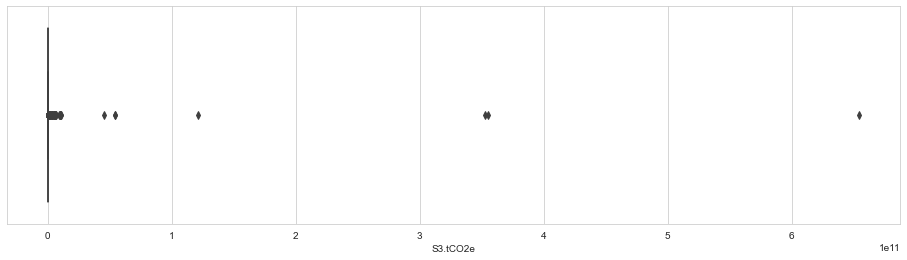

In [12]:
# Visualizing the distribution of the S3 emissions data using a box and whisker plot.
# Outliers were included in this plot.
plt.figure(figsize=(16,4))
sns.boxplot(x='S3.tCO2e', data=s3_data)
plt.show()

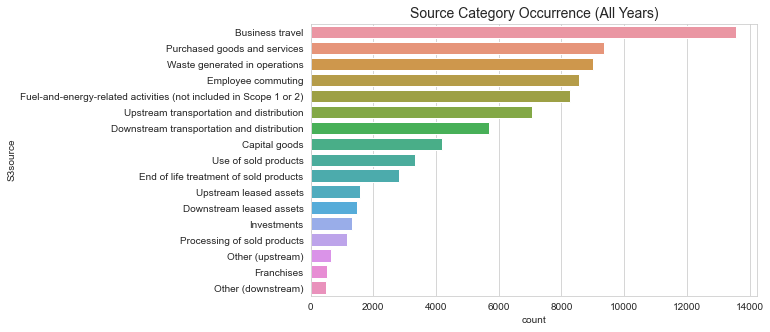

In [13]:
# Visualizing the count of S3 categories in the main dataframe.
plt.figure(figsize=(8,5))
sns.countplot(y='S3source', data=s3_data, orient='h', order = s3_data['S3source'].value_counts().index)
plt.title('Source Category Occurrence (All Years)', fontsize=14)
plt.show()

In [14]:
# Visualizing the Total S3 emissions for each S3 source category in the dataframe.
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.barplot(y='S3source', x='S3.tCO2e', data=s3_data, estimator= sum, ci=None, orient='h', order=s3_data[['S3source','S3.tCO2e']].dropna().groupby('S3source')['S3.tCO2e'].sum().nlargest(20).index)
plt.title('Total S3 Emissions per Source Category (2010 -2019)', fontsize=14)
plt.show()

In [15]:
# Viewing individual summed values for each S3 category in the above chart.
s3_data[['S3source','S3.tCO2e']].dropna().groupby('S3source')['S3.tCO2e'].sum().nlargest(20)

S3source
Purchased goods and services                                         1.070993e+12
Downstream transportation and distribution                           3.622821e+11
Use of sold products                                                 1.906972e+11
Waste generated in operations                                        1.778655e+11
Other (downstream)                                                   4.559374e+10
Fuel-and-energy-related activities (not included in Scope 1 or 2)    2.584983e+10
Upstream transportation and distribution                             2.196641e+10
Investments                                                          1.620190e+10
Other (upstream)                                                     1.087793e+10
Processing of sold products                                          1.021938e+10
Business travel                                                      8.093874e+09
Capital goods                                                        7.337059e+09
Employe

In [64]:
# Visualizing the Total S3 emissions for each S3 source category in the 2020 and 2019 dataframe.
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
sns.barplot(y='S3source', x='S3.tCO2e', data=s3_data19, ci=None, estimator=sum, orient='h',
           order=s3_data19.groupby('S3source')['S3.tCO2e'].sum().nlargest(20).index)
plt.title('Total S3 Emissions per Source Category (2020)', fontsize=14)
plt.xlabel('')
plt.subplot(2,1,2)
sns.barplot(y='S3source', x='S3.tCO2e', data=s3_data18, ci=None, estimator=sum, orient='h',
           order=s3_data18.groupby('S3source')['S3.tCO2e'].sum().nlargest(20).index)
plt.title('Total S3 Emissions per Source Category (2019)', fontsize=14)
plt.xlabel('')

plt.show()

In [17]:
# Visualizing the distribution of S3 emissions for each S3 source category in the 2020 dataframe.
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
plt.subplot(2,1,1)
plt.title('Scope 3 Emissions Distribution (2020)', fontsize=14)
sns.boxplot(x='S3.tCO2e', data=s3_data19, showfliers=False)
plt.subplot(2,1,2)
sns.boxplot(x='S3.tCO2e', data=s3_data19, showfliers=True)
plt.show()

In [18]:
# Visualizing the distribution of S3 emissions for each S3 source category in the 2019 dataframe.
plt.figure(figsize=(16,4))
sns.set_style('whitegrid')
plt.subplot(2,1,1)
plt.title('Scope 3 Emissions Distribution (2019)', fontsize=14)
sns.boxplot(x='S3.tCO2e', data=s3_data18, showfliers=False)
plt.subplot(2,1,2)
sns.boxplot(x='S3.tCO2e', data=s3_data18, showfliers=True)
plt.show()

In [19]:
# Visualizing the no. of missing values in the 2020 and 2019 dataframe.
# Yellow lines show presence of missing values.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.heatmap(s3_data19.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Distribution (2020)', fontsize=14)
plt.subplot(1,2,2)
sns.heatmap(s3_data18.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Distribution (2019)', fontsize=14)
plt.show()

### First Supporting Dataframe
* <u>Filename</u>: regSub_plus_s3.csv

In [20]:
# Determining the top 10 activities most companies belong to.
data_19['MainAct'].value_counts().head(10)

BankingAndInvestmentServices          657
ITAndSoftware                         276
RealEstateOwnersAndDevelopers         238
REIT                                  234
BiotechAndPharma                      233
IndustrialMachinery                   199
DealersWholesalersAndDistributors     194
ElectronicComponents                  188
MediaAndMarketing                     187
ProfessionalAndInformationServices    172
Name: MainAct, dtype: int64

### Second Supporting Dataframe
* <u>Filename</u>: Industry_Activity Grouping.xlsx

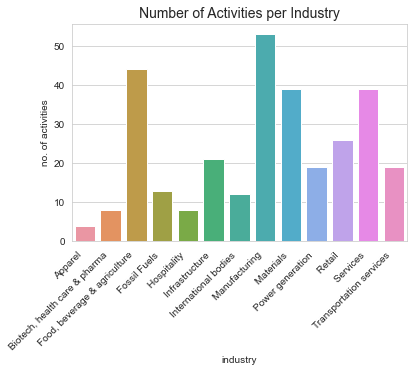

In [21]:
# Visualizing the number of activities in each industry
sns.countplot(x='industry', data=industry_grp)
plt.xticks(rotation=45, ha='right')
plt.ylabel('no. of activities')
plt.title('Number of Activities per Industry', fontsize=14)
plt.show()

In [22]:
# Viewing individual summed values for each industry in the above chart.
industry_grp.groupby('industry')['activity'].count()

industry
Apparel                            4
Biotech, health care & pharma      8
Food, beverage & agriculture      44
Fossil Fuels                      13
Hospitality                        8
Infrastructure                    21
International bodies              12
Manufacturing                     53
Materials                         39
Power generation                  19
Retail                            26
Services                          39
Transportation services           19
Name: activity, dtype: int64

## Final Dataframe Preparation
This section shows the process of joining all three dataframes into one final dataframe primarily using the account id as the joining key. 

In [23]:
# This code joins the S3 emissions data for 2020 & 2019 using the account id & the S3 category as the joining key.
# This is a left join because the objectives of this project is directed towards the S3 2020 data.
# The next join is peformed between the resulting dataframe with the sectors dataframe using the account id as the key.
# This is also a left join that adds the activity column and populates it.
full_19 = s3_data19.merge(s3_data18, how='left', on=['account_id', 'S3source'], suffixes=('', '_18')).iloc[:,[0,1,2,4,6,12]].merge(sectors, how='left', on='account_id')

# This converts the newly added activity column into lowercase.
# This will enable us to further join and get the industries.
full_19['MainAct'] = full_19['MainAct'].str.lower()

# This joins the resulting dataframe with the industry grouping dataframe and populates the newly added industry column.
full_19 = full_19.merge(industry_grp, how='left', left_on='MainAct' , right_on='activity').iloc[:,:-1]

# This removes whitespace characters at the beginning and end of the text.
full_19['industry'] = full_19['industry'].str.strip()

In [24]:
# New columns are added to the dataframe.
full_19['s3_diff'] = full_19['S3.tCO2e'] - full_19['S3.tCO2e_18']    # Difference between 2020 and 2019 S3 emissions.
full_19['absperct'] = abs(full_19['s3_diff']/full_19['S3.tCO2e_18']) # Absolute percentage difference from 2019 S3 emissions.

In [25]:
full_19[full_19['industry'].isnull()].head(20)

account_id  midYear                                           S3source  \
19           79     2019                      Waste generated in operations   
20           79     2019                                    Business travel   
21           79     2019                       Purchased goods and services   
229         389     2019         Downstream transportation and distribution   
230         389     2019  Fuel-and-energy-related activities (not includ...   
231         389     2019           Upstream transportation and distribution   
365         609     2019                        Processing of sold products   
366         609     2019  Fuel-and-energy-related activities (not includ...   
367         609     2019                                    Business travel   
368         609     2019                      Waste generated in operations   
369         609     2019         Downstream transportation and distribution   
370         609     2019           Upstream transportation and distribution   
371         609     2019                       Purchased goods and services   
404         631     2019                                 Employee commuting   
405         631     2019                       Purchased goods and services   
406         631     2019                        Processing of sold products   
407         631     2019                      Waste generated in operations   
408         631     2019                                    Business travel   
416         641     2019                                    Business travel   
417         641     2019                       Purchased goods and services   

                                         S3methodology      S3.tCO2e  \
19   Our office managers keep track of different ty...  6.256000e+00   
20   99.7% of our Scope 3 emissions are because of ...  7.955754e+04   
21   Our office managers keep track of different ty...  2.343700e+02   
229  Emissions have been calculated in line with th...  1.469400e+04   
230  Emissions have been calculated in line with th...  9.200000e+01   
231  Emissions have been calculated in line with th...  5.881000e+03   
365  Category 10 emissions are calculated using the...  3.347852e+07   
366  Per the WRI GHG protocol, Utilize industry ave...  1.238561e+06   
367  Primary activity data was obtained on company-...  2.553000e+03   
368  Category 5 emissions are calculated using the ...  2.510000e+02   
369  Category 9 emissions are based on distance-bas...  8.113670e+05   
370  Category 4 emissions are calculated using the ...  1.714400e+04   
371  Emission factors current to 2020 per ThinkStep...  1.737057e+06   
404  Calculation is based on internal questionnaire...  4.890000e+02   
405  We included: Purchased Material (plastics) (gl...  3.858947e+06   
406  We convert PET, HDPE and PP plastic granulate ...  3.855969e+06   
407  The emissions calculation methodology is based...  1.710000e+01   
408  Calculation and verification is provided by ex...  2.216000e+03   
416                                       GHG Protocol  1.118424e+04   
417                                       GHG Protocol  4.096000e+01   

     S3.tCO2e_18 MainAct industry      s3_diff   absperct  
19           NaN     NaN      NaN          NaN        NaN  
20      77524.00     NaN      NaN      2033.54   0.026231  
21           NaN     NaN      NaN          NaN        NaN  
229     13533.00     NaN      NaN      1161.00   0.085790  
230          NaN     NaN      NaN          NaN        NaN  
231      3527.00     NaN      NaN      2354.00   0.667423  
365  12972733.00     NaN      NaN  20505786.00   1.580684  
366    456406.00     NaN      NaN    782155.00   1.713726  
367       230.00     NaN      NaN      2323.00  10.100000  
368       303.00     NaN      NaN       -52.00   0.171617  
369          NaN     NaN      NaN          NaN        NaN  
370          NaN     NaN      NaN          NaN        NaN  
371    609087.00     NaN      NaN   1127970.00   1.8

### Final Dataframe Visualizations

In [26]:
# A chart showing the percentage of companies belonging to industries.
dat = full_19['industry'].value_counts()
plt.subplots(figsize=[10,6])
plt.pie(x=dat, labels=dat.index, autopct='%.1f%%', explode=[0.05]*len(dat), pctdistance=0.5)
plt.title('Organisations By Industry', fontsize=14)
plt.show()


In [27]:
# This chart shows the summation of emissions by industry for 2020 and 2019.
datt = full_19.groupby('industry', as_index=False)[['S3.tCO2e','S3.tCO2e_18']].sum()

fig, ax1 = plt.subplots(figsize=(12,6))
datt.plot.bar(x='industry', ax=ax1)
plt.legend(['S3.tCO2e_2020', 'S3.tCO2e_2019'])
plt.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.title('Scope 3 Emissions by Industry', fontsize=14)
plt.show()


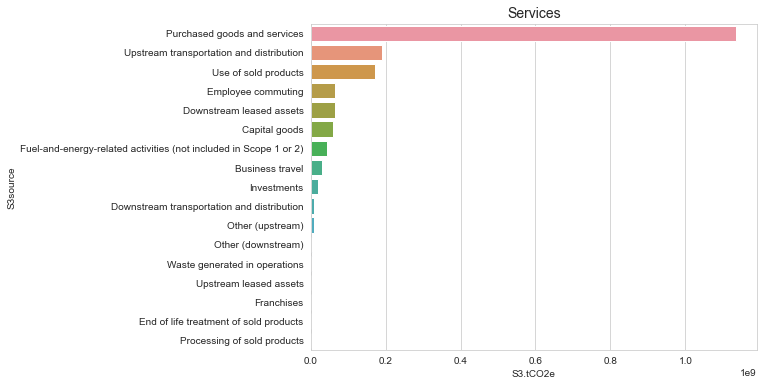

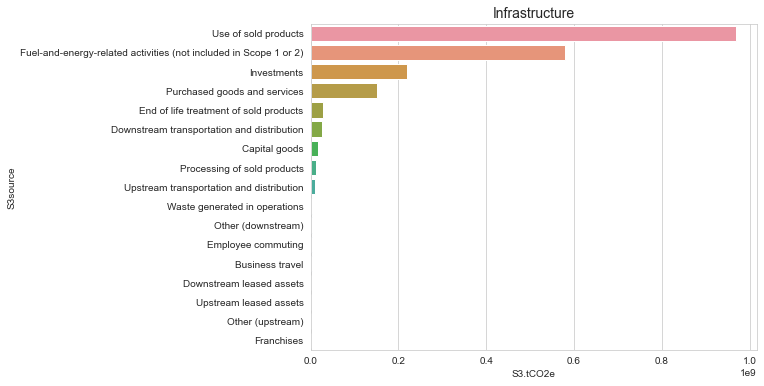

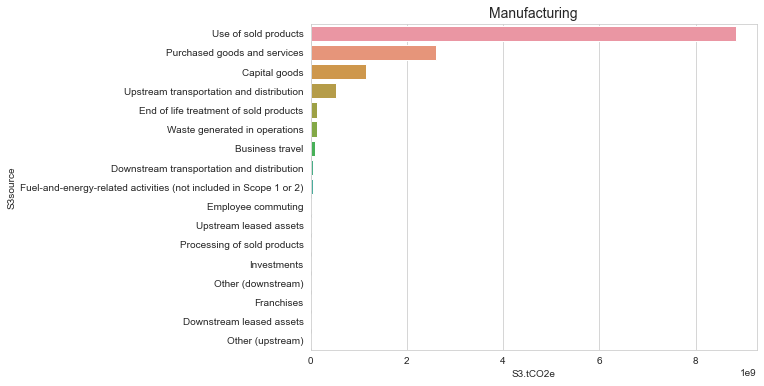

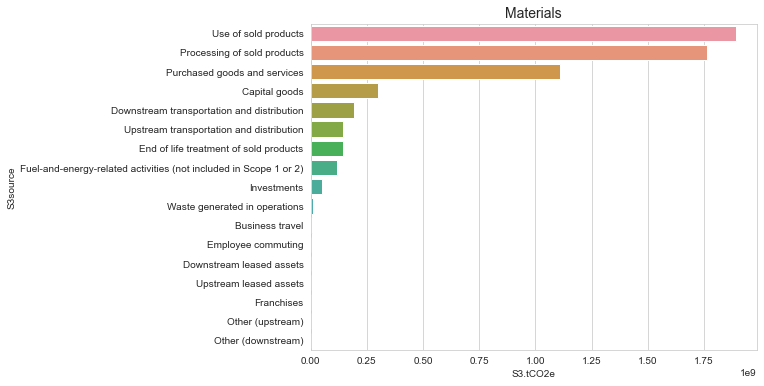

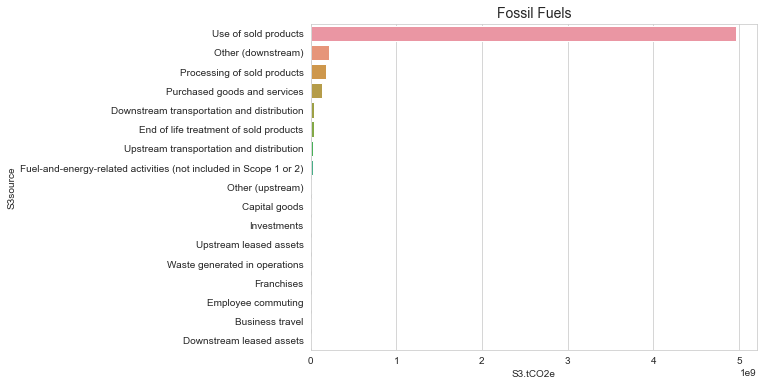

In [28]:
# Selected few industries with high S3 emissions.
ls = ['Services', 'Infrastructure', 'Power generation', 'Manufacturing', 'Materials', 'Retail', 'Fossil Fuels']

# Plotting to view the most contributing S3 source to S3 emissions in these selected industries.
for i in ls:
    ds = full_19[full_19['industry'] == i]
    plt.figure(figsize=(8,6))
    sns.barplot(y='S3source', x='S3.tCO2e', data=ds, estimator= sum, ci=None, orient='h', order=ds[['S3source','S3.tCO2e']].dropna().groupby('S3source')['S3.tCO2e'].sum().nlargest(20).index)
    plt.title(i, fontsize=14)
    plt.show()
    

In [29]:
full_19[full_19['industry'] == 'Power generation'].corr()

account_id  midYear  S3.tCO2e  S3.tCO2e_18   s3_diff  absperct
account_id     1.000000      NaN -0.012551    -0.012742  0.004122 -0.049242
midYear             NaN      NaN       NaN          NaN       NaN       NaN
S3.tCO2e      -0.012551      NaN  1.000000     0.999733 -0.917832 -0.015465
S3.tCO2e_18   -0.012742      NaN  0.999733     1.000000 -0.926754 -0.016345
s3_diff        0.004122      NaN -0.917832    -0.926754  1.000000  0.029392
absperct      -0.049242      NaN -0.015465    -0.016345  0.029392  1.000000

In [30]:
# Selecting one category to develop algorithm for.
# The S3 category selected here is 'Use of sold products'.
df_usp = full_19.loc[(full_19['S3source'] == 'Use of sold products')].reset_index(drop=True)

In [31]:
df_usp.head()

account_id  midYear              S3source  \
0          53     2019  Use of sold products   
1          64     2019  Use of sold products   
2          87     2019  Use of sold products   
3         149     2019  Use of sold products   
4         154     2019  Use of sold products   

                                       S3methodology     S3.tCO2e  \
0  These emissions were calculated by modelling t...  19712154.00   
1  Energy/Accelerant Using Products Lifetime-Uses...    508000.00   
2  Data source: Gas related business, LHV standar...   3902240.00   
3  In 2019, the number of shipments of AcBel(Taiw...   1004129.85   
4  This category includes the GHG emissions gener...     13325.00   

   S3.tCO2e_18                        MainAct                       industry  \
0  19726029.87  realestateownersanddevelopers                 Infrastructure   
1       534.00    medicalequipmentandsupplies  Biotech, health care & pharma   
2          NaN                powergeneration               Power generation   
3          NaN      fabricatedmetalcomponents                  Manufacturing   
4     54657.00     infrastructureconstruction                 Infrastructure   

     s3_diff    absperct  
0  -13875.87    0.000703  
1  507466.00  950.310861  
2        NaN         NaN  
3        NaN         NaN  
4  -41332.00    0.756207

## Algorithm Development

This algorithm is divided into two parts.
1. The first part looks at the text data in the S3 Methodology column and flags based on defined conditions.
2. The second part looks at the numerical data in the revenue and absolute percentage column and generates flags based on defined conditions.
3. The final part takes the generated flags from the steps 1&2 then generates the final flag and proposed action to take.

### <u>Part 1</u>: S3 Methodology Flag

#### Text Preprocessing

In [32]:
# Importing the Python NLTK and other required packages.
# You might need to run 'pip install nltk' if you don't have it.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

# Before importing the below package, you need to run 'pip install langid' in your command propmpt.
# This tool helps to detect the language of any input text.
import langid
from langid.langid import LanguageIdentifier, model

# Changing the confidence interval from logarithmic limits to probability limits.
lang_identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

# Testing the language identifier module.
text='Volume fuel sold, fuel emission factors.'
lang_identifier.classify(text)

('es', 0.9990256126740593)

In [33]:
# Converting the datatype of the column into a string object type.
df_usp['S3methodology'] = df_usp['S3methodology'].astype(str)

In [34]:
df_usp['MethodLang'] = np.nan   # Creating a column for the language of the text.
df_usp['method_flag'] = np.nan  # Creating a column for the flag.

# Loop through the dataframe
for i in range(len(df_usp)):
    tp = df_usp['S3methodology'][i]                  # Writes the methodology into a variable.   
    tmp = re.sub('[^a-zA-Z0-9]', ' ', tp)            # Replaces non-alphanumeric characters with a whitespace character.
    temp = tmp.lower().split()                       # Lowercase and splits the methodology on whitespace.
    
    if len(temp) <= 1:                               # Checks if the number of words is less than or equal to 1.
        df_usp.loc[i, 'MethodLang'] = 'na'           # Sets the language column of the entry as 'na'.
        df_usp.loc[i, 'method_flag'] = 'FLAG'        # Flags that entry.
        
            
    else:                                            # Checks if the number of words is greater than 1.
        if re.search(r'(^\d+$)|(^\d+\s+\d+$)', tmp): # Checks if the entry contains only numbers.
            df_usp.loc[i, 'MethodLang'] = 'na'       # Sets the language column of the entry as 'na'.
            df_usp.loc[i, 'method_flag'] = 'FLAG'    # Flags that entry.
            
        elif 'carbone' in temp:                      # Checks if 'carbone' is in the entry.(mostly classified as non-english)
            df_usp.loc[i, 'MethodLang'] = 'en'       # Sets the language column of the entry as 'en'.
            
        elif 'nan' in temp or 'na' in temp:          # Checks if 'na' or 'nan' is in the entry.
            df_usp.loc[i, 'MethodLang'] = 'na'       # Sets the language column of the entry as 'na'.
            df_usp.loc[i, 'method_flag'] = 'FLAG'    # Flags that entry.
            
        elif re.search(r'(<U\+\S+>){2}', tp):        # Checks if unicode characters is in the entry more than twice.(e.g. <U+125>).
            df_usp.loc[i, 'MethodLang'] = 'na'       # Sets the language column of the entry as 'na'.
            df_usp.loc[i, 'method_flag'] = 'FLAG'    # Flags that entry.
            
        elif re.search(r'^n\S*[an]', tp):            # Checks if 'n' is followed by 'a', 'n' or 'an' in that entry.(e.g n/a, n/an) 
            df_usp.loc[i, 'MethodLang'] = 'na'       # Sets the language column of the entry as 'na'.
            df_usp.loc[i, 'method_flag'] = 'FLAG'    # Flags that entry.
           
        else:                                        # If none of the above conditions are met.
            tmp =lang_identifier.classify(tmp)       # Classify the entry using langid package.
            df_usp.loc[i, 'MethodLang'] = tmp[0]     # Select the language from the output.
            if tmp[0] != 'en':                       # Check if the result is not english.
                df_usp.loc[i, 'method_flag'] = 'FLAG'# Flag entry that is not in english.
                
        
        

In [35]:
# Isolating languages that are in english into another dataframe.
df_usp1 = df_usp[df_usp['MethodLang'] == 'en'].reset_index(drop=True)

In [36]:
# Creating stopwords list using nltk english stopwords and domain-specific stopwords
stwords = stopwords.words('english') + ['us', 'etc', 'eq', 'unit', 'co', 'tco', 'kg', 'kgco', 'km', 'kw', 'kwh', 'hr', 'hour', 'per', 'day', 'year']

#Creating a column to store the cleaned text.
df_usp1['method_cln'] = np.nan

for i in range(len(df_usp1)):
    tmp = df_usp1.loc[i, 'S3methodology'].lower() # Lowercase the entry.
    if re.search(r'(<u\+\S+>){1}', tmp):          # Checks for a unicode character occuring once.
        tmp = re.sub(r'(<u\+\S+>){1}', ' ', tmp)  # Replaces unicode character with whitespace character.
    tmp = re.sub('http\S+', ' ', tmp)             # Replace links with whitespace character.
    tmp = re.sub('[^a-zA-Z]', ' ', tmp)           # Remove all non-alphabetic characters.
    tmp = nltk.word_tokenize(tmp)                 # Tokenize words
    if len(tmp) > 2:                              # Checks if no. of words is more than 2.
        tmp = [wordnet.lemmatize(word) for word in tmp if word not in stwords and len(word) > 1] # Lemmatize word if conditions passed.
        tmp = ' '.join(tmp)                       # joins the words with a space.
        df_usp1.loc[i, 'method_cln'] = tmp        # writes the joint words into the dataframe.
    else:                                         # Checks if no. of words is less than or equal to 2.
        tmp = ' '.join(tmp)                       # joins the words with a space.
        df_usp1.loc[i, 'method_cln'] = tmp        # writes the joint words into the dataframe.
        df_usp1.loc[i, 'method_flag'] = 'FLAG'    # Flags the entry.    
    

#### Text Model Building 

In [37]:
# Before importing the below package, you need to run 'pip install gensim' in your command propmpt.
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Creating documents(a container for each methodology in the dataframe)
# Filtering outobservations that have not been flagged.
meth_docs = [TaggedDocument(nltk.word_tokenize(text), [i]) for i, text in enumerate(df_usp1['method_cln']) if df_usp1.loc[i,'method_flag'] != 'FLAG']

In [38]:
# Initializing and setting model parameters
# After much iteration, these are the optimum parameters for this model.
model = Doc2Vec(dm=0,vector_size=100, window=2, min_count=2, workers=10, epochs = 200)

# Building vocabulary
model.build_vocab(meth_docs)

# Training model with supplied parameters
model.train(meth_docs, total_examples = model.corpus_count, epochs = model.epochs)

#### Assessing the Model

In [39]:
# Importing module.
from collections import Counter

# The idea behind this assessment is basically feeding the text back to the model to determine if it classifies it correctly.
rank = []
for i, doc in enumerate(meth_docs):
    vec = model.infer_vector(doc.words)
    sim = model.docvecs.most_similar([vec], topn=len(meth_docs))
    grank = [a for a,b in sim].index(doc.tags[0])
    rank.append(grank)
    if grank >1:
        print(i)

Counter(rank)    
    

210


Counter({0: 595, 1: 7, 2: 1})

#### Visualizing the Document Vectors

In [41]:
# Generating vectors for cleaned text.
meth2vec = [model.infer_vector((df_usp1['method_cln'][i].split(' '))) for i in range(0,len(df_usp1['method_cln']))]

# Writing vectors to a column.
df_usp1['meth2vec'] = np.array(meth2vec).tolist()

In [42]:
# Before importing the below package, you need to run 'pip install texthero' in your command propmpt.
import texthero as hero

# Using t-SNE(t-distributed stochastic neighbor embedding) to convert the high-dimensional vectors.
# The t-SNE technique applies non-linear dimensionality reduction.
df_usp1['tnsem2v'] = hero.tsne(df_usp1['meth2vec'])

In [43]:
# Visualizing the vectors.
hero.scatterplot(df_usp1, col='tnsem2v', title="S3 Methodology Vectors", hover_data = ['account_id','industry'])

#### Text Model Building cont... (Clustering Vectors)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



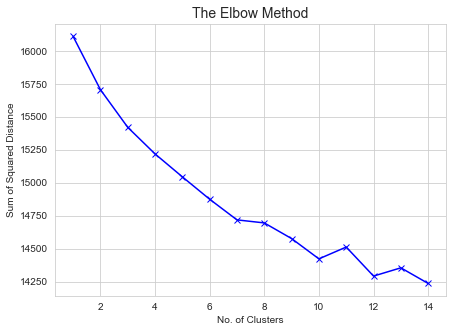

In [63]:
# Importing package for clustering.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Using Elbow Method to determine the optimal number of clusters.(7 clusters).
ssd = []
K = range(1,15)
for k in K:
    kmodel = KMeans(n_clusters=k,random_state=0, max_iter=100)
    kmodel.fit(model.docvecs.vectors_docs)
    ssd.append(kmodel.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, ssd, 'bx-')
plt.title('The Elbow Method', fontsize=14)
plt.xlabel('No. of Clusters')
plt.ylabel('Sum of Squared Distance')
plt.show()

In [45]:
# Initializing clustering model with necessary parameters.
kmodel = KMeans(n_clusters=7, random_state=0, max_iter=100)

# Clustering the vectors
X = kmodel.fit(model.docvecs.vectors_docs)

# Determing centroids for clusters.
pca = PCA(n_components=2).fit(model.docvecs.vectors_docs)
point = pca.transform(model.docvecs.vectors_docs)

In [46]:
# Plotting Clustering results.
plt.figure
color = ['#FFFF00', '#008000', '#0000FF', '#800080', '#FF0000', '#F542CB', '#F5AB00', '#00F5F5', '#F50072', '#00F576']
k_color = [color[i] for i in X.labels_]
plt.scatter(point[:,0], point[:,1], c=k_color)

centroids = pca.transform(kmodel.cluster_centers_)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='#000000', s=150)
plt.show()

In [47]:
# Viewing how many documents are in each cluster.
Counter(X.labels_.tolist())

Counter({0: 83, 1: 51, 3: 83, 2: 112, 4: 60, 5: 135, 6: 86})

In [48]:
# Creating a new column for the clusters.
df_usp1['mthd_clust'] = np.nan

# Writing the clusters into the dataframe.
for i, clus in enumerate(X.labels_.tolist()):
    df_usp1.loc[i, 'mthd_clust'] = clus

#### Flagging Text Process

In [49]:
# Creating a function that returns the words when given a document tag number.
def return_words(doc_tag):
    doc = filter(lambda x: doc_tag in x.tags, meth_docs)
    words = list(doc)[0][0]
    return words

# Creating a new list for documents that have been checked.
checked = []

# The below loop checks the text with various conditions such as similarity confidence, length, clusters and industry.
for i, doc in enumerate(meth_docs):
    doc_id = doc.tags[0]
    if doc_id not in set(checked):
        sim = model.docvecs.most_similar(doc_id)[0]
        sim_doc = sim[0]
        sim_doc_words = return_words(sim_doc)
        conf = sim[1]
        #.6 to .79 has really good and detailed methodologies
        #.8 to .89 when no of words<10 is also good but not that detailed, >10 is good and detailed.
        #.9 to 1 is a good but a detailed duplicate when word>10, else non-detailed duplicate

        if conf >= .6 and conf <= 1:
            df_usp1.loc[[doc_id, sim_doc], 'method_flag'] = 'OK'
            checked.append(doc_id)
            checked.append(sim_doc)
        elif conf >= .5 and conf < .6:
            ind1 = df_usp1.loc[doc_id, 'industry']
            ind2 = df_usp1.loc[sim_doc, 'industry']
            clus1 = df_usp1.loc[doc_id, 'mthd_clust']
            clus2 = df_usp1.loc[sim_doc, 'mthd_clust']
            if ind1 == ind2:
                df_usp1.loc[[doc_id, sim_doc], 'method_flag'] = 'OK'
                checked.append(doc_id)
                checked.append(sim_doc)
            elif clus1 == clus2:
                if len(doc.words) > 10 and len(sim_doc_words) > 10:
                    df_usp1.loc[[doc_id, sim_doc], 'method_flag'] = 'OK'
                    checked.append(doc_id)
                    checked.append(sim_doc)
                    
                elif len(doc.words) > 10 and len(sim_doc_words) <= 10:
                    df_usp1.loc[doc_id, 'method_flag'] = 'OK'
                    df_usp1.loc[sim_doc, 'method_flag'] = 'OK ?'
                    checked.append(doc_id)
                    checked.append(sim_doc)
                    
                elif len(doc.words) <= 10 and len(sim_doc_words) > 10:
                    df_usp1.loc[sim_doc, 'method_flag'] = 'OK'
                    df_usp1.loc[doc_id, 'method_flag'] = 'OK ?'
                    checked.append(doc_id)
                    checked.append(sim_doc)
                    
                else:
                    df_usp1.loc[sim_doc, 'method_flag'] = 'OK ?'
                    df_usp1.loc[doc_id, 'method_flag'] = 'OK ?'
                    checked.append(doc_id)
                    checked.append(sim_doc)
            elif len(doc.words) > 15:
                df_usp1.loc[doc_id, 'method_flag'] = 'OK'
                checked.append(doc_id)
            else:
                df_usp1.loc[doc_id, 'method_flag'] = 'OK ?'
                checked.append(doc_id)
                        
                    
        elif conf > .4 and conf < .5:
            ind1 = df_usp1.loc[doc_id, 'industry']
            ind2 = df_usp1.loc[sim_doc, 'industry']
            clus1 = df_usp1.loc[doc_id, 'mthd_clust']
            clus2 = df_usp1.loc[sim_doc, 'mthd_clust']
            
            if ind1 == ind2:
                df_usp1.loc[doc_id, 'method_flag'] = 'OK'
                checked.append(doc_id)
            elif clus1 == clus2:
                df_usp1.loc[doc_id, 'method_flag'] = 'OK'
                checked.append(doc_id)
                
            elif len(doc.words) > 20:
                df_usp1.loc[doc_id, 'method_flag'] = 'OK'
                checked.append(doc_id)
            else:
                df_usp1.loc[doc_id, 'method_flag'] = 'FLAG'
                checked.append(doc_id)
                     
        else:
            df_usp1.loc[doc_id, 'method_flag'] = 'FLAG'
            checked.append(doc_id)                
                
    else:
        pass
        
    

In [50]:
# Creating the final dataframe by merging both 'use of sold products' dataframes.
final_usp = df_usp.merge(df_usp1.iloc[:,[0,11,12,13,15]], on='account_id', how= 'left', suffixes=('','_y'))

# Copying the flagged items into the initial column from the dataframe.
for i, bools in enumerate(final_usp['method_flag'].isnull()):
    if bools == True:
        final_usp.loc[i, 'method_flag'] = final_usp.loc[i, 'method_flag_y']
    else:
        pass


# Dropping unnecessary columns.
final_usp.drop(['S3.tCO2e_18','MainAct', 'method_flag_y'], axis=1, inplace=True)

### <u>Part 2</u>: S3 Emissions Flag

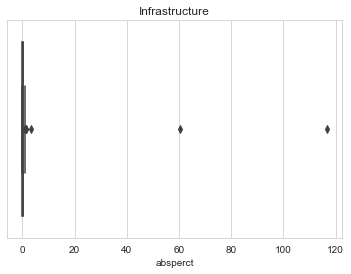

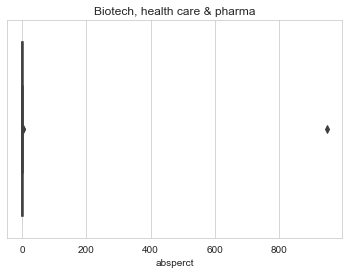

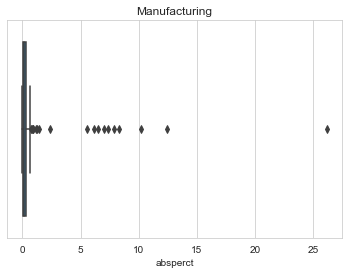

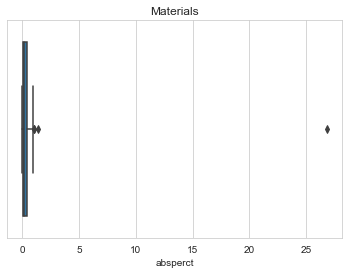

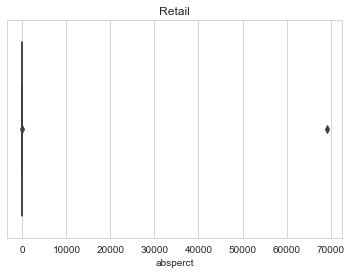

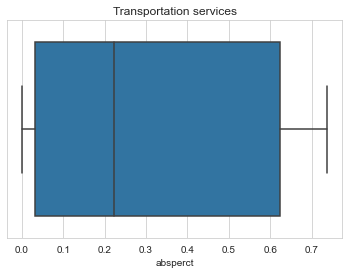

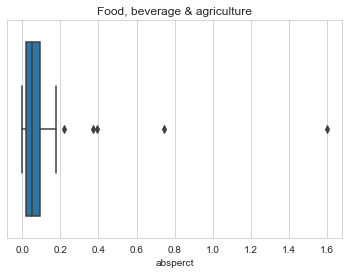

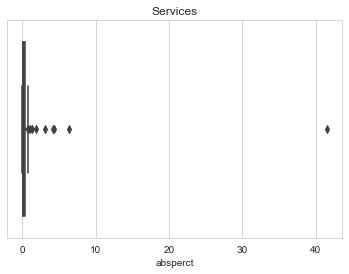

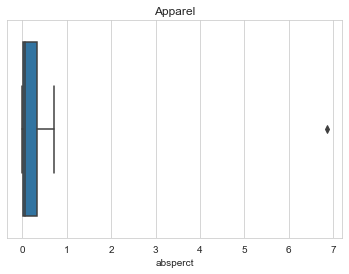

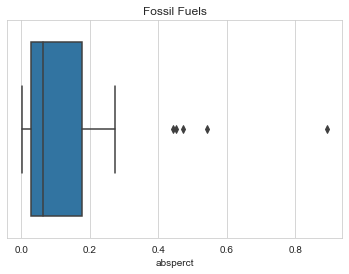

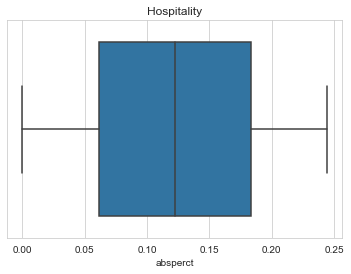

In [51]:
# Creating a list of unique industries in the dataframe.
industry=final_usp['industry'].dropna().unique().tolist()

# Creating box and whisker plots for each industry.
for ind in industry:
    da = final_usp[final_usp['industry'] == ind]
    sns.boxplot(x='absperct', data=da)
    plt.title(ind)
    plt.show()

In [52]:
# Creating a dictionary to record the maximum whisker value for each industry.
max_whis = {}

# Writing maximum whisker values for each industry.
for ind in industry:
    data = final_usp[final_usp['industry'] == ind].dropna(subset=['absperct']).copy()
    stats = plt.cbook.boxplot_stats(data['absperct'])[0]
    max_whis[ind] = stats['whishi']

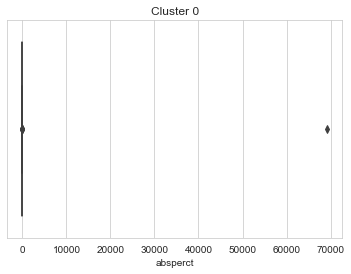

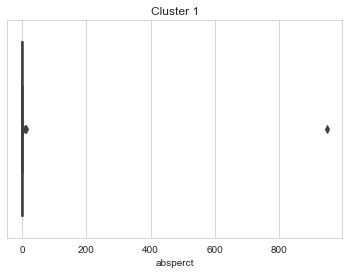

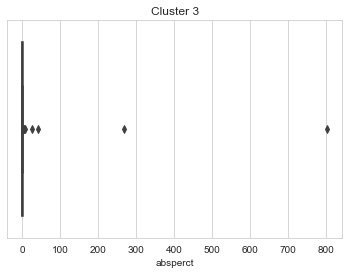

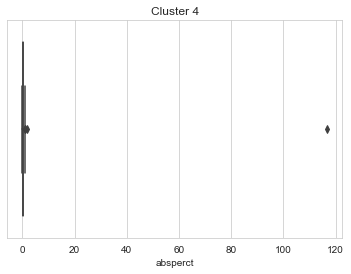

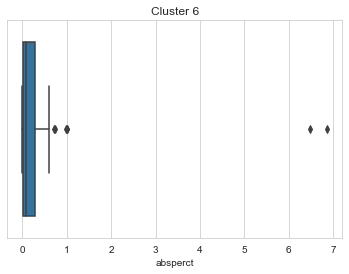

In [53]:
# Creating a list of unique clusters in the dataframe.
clusters= final_usp['mthd_clust'].dropna().unique().tolist()

# Creating box and whisker plots for each cluster.
for clus in range(0,7):
    da = final_usp[final_usp['mthd_clust'] == clus]
    sns.boxplot(x='absperct', data=da.dropna(subset=['absperct']))
    plt.title('Cluster '+ str(clus))
    plt.show()

In [54]:

# Creating a dictionary to record the maximum whisker value for each cluster.
clus_whis = {}

# Writing maximum whisker values for each cluster.
for i in clusters:
    data = final_usp[final_usp['mthd_clust'] == i].dropna(subset=['absperct'])
    stats = plt.cbook.boxplot_stats(data['absperct'])[0]
    clus_whis[i] = stats['whishi']
    

In [55]:
# Creating a boolean mask over indicated columns to show presence of missing values.
null_ind = final_usp['industry'].isnull()
null_clus= final_usp['mthd_clust'].isnull()

# Creating flag column for S3 emissions data.
final_usp['s3_flag'] = np.nan

# The below loop checks the emissions with various conditions such as greater than their respective cluster or industry whisker.
for i, val in enumerate(null_ind):
    if val == False:
        ind = final_usp.loc[i, 'industry'] 
        perct = final_usp.loc[i, 'absperct']
        
        if perct == 0:
            final_usp.loc[i, 's3_flag'] = 'FLAG!'
        elif perct > max_whis[ind]:
            final_usp.loc[i, 's3_flag'] = 'FLAG'
        elif perct <= max_whis[ind]:
            final_usp.loc[i, 's3_flag'] = 'OK'
        else:
            pass
        
    elif val == True and null_clus[i] == True:
        final_usp.loc[i, 's3_flag'] = 'FLAG'
    
    elif val == True:
        if null_clus[i] == False:
            clus = final_usp.loc[i, 'mthd_clust'] 
            perct = final_usp.loc[i, 'absperct']
        
            if perct == 0:
                final_usp.loc[i, 's3_flag'] = 'FLAG!'
            elif perct > clus_whis[clus]:
                final_usp.loc[i, 's3_flag'] = 'FLAG'
            elif perct <= clus_whis[clus]:
                final_usp.loc[i, 's3_flag'] = 'OK'
            else:
                pass
            
        elif null_clus[i] == True:
            ls = [a for a in max_whis.values()]
            avg = sum(ls)/len(ls)
            perct = final_usp.loc[i, 'absperct']
            
            if perct > avg:
                final_usp.loc[i, 's3_flag'] = 'FLAG'
            elif perct <= avg:
                final_usp.loc[i, 's3_flag'] = 'OK'
            else:
                pass
     
    else:
        pass
    

In [56]:
# Creating boolean mask over the the flag indicating missing values.
nulls3_flag = final_usp['s3_flag'].isnull()

# The below loop checks the emissions with various conditions such as greater than their respective cluster or industry whisker.
for i, val in enumerate(null_clus):
    clus = final_usp.loc[i, 'mthd_clust']
    
    if val == False:
        clus = final_usp.loc[i, 'mthd_clust'] 
        perct = final_usp.loc[i, 'absperct']
        
        if perct == 0:
            final_usp.loc[i, 's3_flag'] = 'FLAG!'
        elif perct > clus_whis[clus]:
            final_usp.loc[i, 's3_flag'] = 'FLAG'
        elif perct <= clus_whis[clus]:
            if nulls3_flag[i] == True:
                final_usp.loc[i, 's3_flag'] = 'OK'
            else:
                pass
        elif final_usp.loc[i, 'method_flag'] == 'OK':
            final_usp.loc[i, 's3_flag'] = 'OK'
        elif final_usp.loc[i, 'method_flag'] == 'OK ?':
            final_usp.loc[i, 's3_flag'] = 'FLAG'
        elif final_usp.loc[i, 'method_flag'] == 'FLAG':
            final_usp.loc[i, 's3_flag'] = 'FLAG'
        else:
            pass
    elif val == True:
        final_usp.loc[i, 's3_flag'] = 'FLAG'
    else:
        pass
        

### <u>Part 3</u>: Final Flag/Comment

In [57]:
# Creating new column for the final flag/comment.
final_usp['final_flag'] = np.nan

# This loop creates final flag/comment based on previously created flags.
for i in range(len(final_usp)):
    mflag = final_usp.loc[i, 'method_flag']
    sflag = final_usp.loc[i, 's3_flag']
    
    if mflag == 'OK' and sflag == 'OK':
        final_usp.loc[i, 'final_flag'] = 'OK'
    elif mflag == 'FLAG' and (sflag == 'FLAG' or sflag == 'OK'):
        final_usp.loc[i, 'final_flag'] = 'Check major'
    elif (mflag == 'FLAG' or mflag == 'OK ?' or mflag == 'OK') and sflag == 'FLAG!':
        final_usp.loc[i, 'final_flag'] = 'Check major'
    elif mflag == 'OK' and sflag == 'FLAG':
        final_usp.loc[i, 'final_flag'] = 'Check minor'
    elif mflag == 'OK ?' and sflag == 'FLAG':
        final_usp.loc[i, 'final_flag'] = 'Check major'
    elif mflag == 'OK ?' and sflag == 'OK':
        final_usp.loc[i, 'final_flag'] = 'OK'
    else:
        final_usp.loc[i, 'final_flag'] = 'Check major'
    

### Saving File with Comments to Local Drive

In [58]:
# Dropping unnecessary columns.
final_usp.drop(['meth2vec','mthd_clust', 'method_cln', 's3_diff', 'absperct'], axis=1, inplace=True)

# Writing file to CSV file.
final_usp.to_csv('cleaned_s3_usp.csv')

In [59]:
final_usp['final_flag'].value_counts()

OK             489
Check major    176
Check minor     64
Name: final_flag, dtype: int64